In [56]:
###capstone BUSINESS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from time import time
import dill

In [4]:

with open('df_business_clean.pkd', 'rb') as f:
    df_business = dill.load(f)

In [5]:
df_business.describe()

,Price
count,121975.000000
mean,927.367212
std,480.077623
min,169.000000
25%,579.000000
50%,859.990000
75%,1179.000000
max,25000.000000


In [6]:
df_business.head()

,ASIN,Date,Price
0,B00S98NXKY,2015/06/19,1186.99
1,B00S98NXKY,2015/07/14,1169.99
2,B00S98NXKY,2015/08/12,1198.99
3,B00S98NXKY,2015/08/22,1149.99
4,B00S98NXKY,2015/09/03,1199.99


In [7]:
df_business.tail()

,ASIN,Date,Price
132603,B0BJCKZFZ3,2022/11/23,516.99
132604,B0BJCKZFZ3,2022/11/25,516.48
132605,B0BJCKZFZ3,2022/11/25,522.00
132606,B0BJCKZFZ3,2022/11/28,527.99
132607,B0BJCKZFZ3,2022/11/29,524.99


In [8]:
df_business.shape

(132608, 3)

In [9]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132608 entries, 0 to 132607
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ASIN    132608 non-null  object 
 1   Date    132608 non-null  object 
 2   Price   121975 non-null  float64
dtypes: float64(1), object(2)
memory usage: 3.0+ MB


In [10]:
df_business.isnull().sum()

ASIN         0
Date         0
Price    10633
dtype: int64

In [11]:
df_business.dropna(inplace=True)

In [12]:
df_business

,ASIN,Date,Price
0,B00S98NXKY,2015/06/19,1186.99
1,B00S98NXKY,2015/07/14,1169.99
2,B00S98NXKY,2015/08/12,1198.99
3,B00S98NXKY,2015/08/22,1149.99
4,B00S98NXKY,2015/09/03,1199.99
...,...,...,...
132603,B0BJCKZFZ3,2022/11/23,516.99
132604,B0BJCKZFZ3,2022/11/25,516.48
132605,B0BJCKZFZ3,2022/11/25,522.00
132606,B0BJCKZFZ3,2022/11/28,527.99


In [13]:
df_business.reset_index(inplace=True)

In [14]:
df_business

,index,ASIN,Date,Price
0,0,B00S98NXKY,2015/06/19,1186.99
1,1,B00S98NXKY,2015/07/14,1169.99
2,2,B00S98NXKY,2015/08/12,1198.99
3,3,B00S98NXKY,2015/08/22,1149.99
4,4,B00S98NXKY,2015/09/03,1199.99
...,...,...,...,...
121970,132603,B0BJCKZFZ3,2022/11/23,516.99
121971,132604,B0BJCKZFZ3,2022/11/25,516.48
121972,132605,B0BJCKZFZ3,2022/11/25,522.00
121973,132606,B0BJCKZFZ3,2022/11/28,527.99


In [15]:
len(pd.unique(df_business['ASIN']))

2809

In [16]:
ASIN = df_business['ASIN'].unique()

In [17]:
ASIN

array(['B00S98NXKY', 'B00WJTC13O', 'B00ZZ94CS2', ..., 'B0BHY2HS37',
       'B0BJCKVYTZ', 'B0BJCKZFZ3'], dtype=object)

In [18]:
df_business.groupby(['ASIN']).agg({'Price': ['count', 'mean', 'median', 'std', 'min', 'max'] })

Price                                                     
           count         mean    median         std      min      max
ASIN                                                                 
B00S98NXKY    54  1044.978704  1149.970  163.902104   495.00  1199.99
B00WJTC13O   166   287.465843   284.835   44.381700   187.05   378.25
B00ZZ94CS2    20  1257.960000  1299.950  130.192733   999.95  1399.95
B0106GYM1A    56   943.647679   944.000  114.589320   719.00  1129.00
B0147GPUUC    30  1133.829000  1159.925   74.622077   899.00  1249.99
...          ...          ...       ...         ...      ...      ...
B0BHX8HYCJ    14   473.145714   472.915   61.217291   397.00   604.99
B0BHY1PJ5Z    12  2374.411667  2299.495   97.021950  2298.00  2499.99
B0BHY2HS37    13  2197.917692  2248.990   88.730722  2082.00  2299.99
B0BJCKVYTZ    11   557.261818   557.000   11.287637   544.99   584.99
B0BJCKZFZ3    13   525.623846   517.990   15.193558   511.99   562.99

[2809 rows x 6 columns]

In [19]:
df_abstract = df_business.groupby(['ASIN']).agg({'Price': ['count', 'mean', 'median', 'std', 'min', 'max'] })

In [20]:
df_business['Date'] = pd.to_datetime(df_business['Date'])

In [21]:
df_business.drop('index', axis=1, inplace=True)

In [22]:
df_business

,ASIN,Date,Price
0,B00S98NXKY,2015-06-19,1186.99
1,B00S98NXKY,2015-07-14,1169.99
2,B00S98NXKY,2015-08-12,1198.99
3,B00S98NXKY,2015-08-22,1149.99
4,B00S98NXKY,2015-09-03,1199.99
...,...,...,...
121970,B0BJCKZFZ3,2022-11-23,516.99
121971,B0BJCKZFZ3,2022-11-25,516.48
121972,B0BJCKZFZ3,2022-11-25,522.00
121973,B0BJCKZFZ3,2022-11-28,527.99


In [23]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121975 entries, 0 to 121974
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   ASIN    121975 non-null  object        
 1   Date    121975 non-null  datetime64[ns]
 2   Price   121975 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.8+ MB


In [24]:
df_business.groupby(['ASIN']).agg({'Date': ['count',  'min', 'max'] })

Date                      
           count        min        max
ASIN                                  
B00S98NXKY    54 2015-06-19 2021-12-10
B00WJTC13O   166 2020-08-01 2022-11-14
B00ZZ94CS2    20 2015-08-26 2022-04-04
B0106GYM1A    56 2019-12-19 2022-11-16
B0147GPUUC    30 2015-10-22 2021-09-15
...          ...        ...        ...
B0BHX8HYCJ    14 2022-10-12 2022-12-01
B0BHY1PJ5Z    12 2022-10-13 2022-11-28
B0BHY2HS37    13 2022-10-12 2022-12-01
B0BJCKVYTZ    11 2022-10-18 2022-11-29
B0BJCKZFZ3    13 2022-10-18 2022-11-29

[2809 rows x 3 columns]

In [25]:
def date_time_features(df):
    """
    time series features based on time series index.
    """
    df = df.copy()
    #df['hour'] = df.index.hour
    df['dayofweek'] = df.Date.dt.dayofweek
    df['quarter'] = df.Date.dt.quarter
    df['month'] = df.Date.dt.month
    df['year'] = df.Date.dt.year
    df['dayofyear'] = df.Date.dt.dayofyear
    df['dayofmonth'] = df.Date.dt.day
    df['weekofyear'] = df.Date.dt.isocalendar().week.astype("int64")
    # 0: Winter - 1: Spring - 2: Summer - 3: Fall
    df["season"] = np.where(df.month.isin([12,1,2]), 0, 1)
    df["season"] = np.where(df.month.isin([6,7,8]), 2, df["season"])
    df["season"] = np.where(df.month.isin([9, 10, 11]), 3, df["season"])
    return df

In [26]:
df1= date_time_features(df_business)
df1

,ASIN,Date,Price,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,season
0,B00S98NXKY,2015-06-19,1186.99,4,2,6,2015,170,19,25,2
1,B00S98NXKY,2015-07-14,1169.99,1,3,7,2015,195,14,29,2
2,B00S98NXKY,2015-08-12,1198.99,2,3,8,2015,224,12,33,2
3,B00S98NXKY,2015-08-22,1149.99,5,3,8,2015,234,22,34,2
4,B00S98NXKY,2015-09-03,1199.99,3,3,9,2015,246,3,36,3
...,...,...,...,...,...,...,...,...,...,...,...
121970,B0BJCKZFZ3,2022-11-23,516.99,2,4,11,2022,327,23,47,3
121971,B0BJCKZFZ3,2022-11-25,516.48,4,4,11,2022,329,25,47,3
121972,B0BJCKZFZ3,2022-11-25,522.00,4,4,11,2022,329,25,47,3
121973,B0BJCKZFZ3,2022-11-28,527.99,0,4,11,2022,332,28,48,3


In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121975 entries, 0 to 121974
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   ASIN        121975 non-null  object        
 1   Date        121975 non-null  datetime64[ns]
 2   Price       121975 non-null  float64       
 3   dayofweek   121975 non-null  int64         
 4   quarter     121975 non-null  int64         
 5   month       121975 non-null  int64         
 6   year        121975 non-null  int64         
 7   dayofyear   121975 non-null  int64         
 8   dayofmonth  121975 non-null  int64         
 9   weekofyear  121975 non-null  int64         
 10  season      121975 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(7), object(1)
memory usage: 9.8+ MB


In [82]:
## Lag features and window features

In [83]:
# ### Because they are based on the idea that the past might impact the present or even hold some sort of inherent knowledge 
# about the future, lag features are values at earlier timesteps that are deemed valuable. 
# For instance, if you want to forecast comparable price the next week, it can be helpful to generate characteristics 
# for price that occurred the prior week 

In [28]:
def lag_features(df, lags):
    for lag in lags:
        df['price_lag_' + str(lag)] = df.groupby(["ASIN"])['Price'].transform(lambda x: x.shift(lag))
    return df

In [85]:
# Our main goal is to identify the trend, seasonality, and level. 
# This time period has been added in increments of three months, such as three months + one week, three months plus two weeks, 
# six months, etc., because it is three months long.

In [29]:
df1= lag_features(df1, [91, 98, 105, 112, 119, 126, 182, 364, 546, 728])

df1.head()

,ASIN,Date,Price,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,...,price_lag_91,price_lag_98,price_lag_105,price_lag_112,price_lag_119,price_lag_126,price_lag_182,price_lag_364,price_lag_546,price_lag_728
0,B00S98NXKY,2015-06-19,1186.99,4,2,6,2015,170,19,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B00S98NXKY,2015-07-14,1169.99,1,3,7,2015,195,14,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B00S98NXKY,2015-08-12,1198.99,2,3,8,2015,224,12,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B00S98NXKY,2015-08-22,1149.99,5,3,8,2015,234,22,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B00S98NXKY,2015-09-03,1199.99,3,3,9,2015,246,3,36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
df1.tail()

,ASIN,Date,Price,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,...,price_lag_91,price_lag_98,price_lag_105,price_lag_112,price_lag_119,price_lag_126,price_lag_182,price_lag_364,price_lag_546,price_lag_728
230479,B0BLH4R831,2022-11-21,1019.79,0,4,11,2022,325,21,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230480,B0BLH4R831,2022-11-21,1015.79,0,4,11,2022,325,21,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230481,B0BLH4R831,2022-11-22,1009.79,1,4,11,2022,326,22,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230482,B0BLH4R831,2022-11-23,1005.79,2,4,11,2022,327,23,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230483,B0BLH4R831,2022-11-24,1269.00,3,4,11,2022,328,24,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
# Rolling Mean Features
# The moving average feature is derived using the rolling approach. 
# The window argument also conveys the number of steps remaining. Past 2-3-5 numbers, on average, etc.

# When employing the rolling approach, it takes into account all past averages, 
# including itself. This is a problem. Therefore, after receiving a delay, we must produce the moving average feature.

In [30]:
def roll_mean_features(df, windows):
    for window in windows:
        df['price_roll_mean_' + str(window)] = df.groupby(["ASIN"])['Price']. \
                                             transform(lambda x: x.shift(1).rolling(window=window, min_periods=10, win_type="triang").mean())
    return df

In [90]:
# to reflect information about 1 and 1.5 years ago in the data:

In [31]:
df1= roll_mean_features(df1, [365, 546])

df1.head()

,ASIN,Date,Price,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,...,price_lag_105,price_lag_112,price_lag_119,price_lag_126,price_lag_182,price_lag_364,price_lag_546,price_lag_728,price_roll_mean_365,price_roll_mean_546
0,B00S98NXKY,2015-06-19,1186.99,4,2,6,2015,170,19,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B00S98NXKY,2015-07-14,1169.99,1,3,7,2015,195,14,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B00S98NXKY,2015-08-12,1198.99,2,3,8,2015,224,12,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B00S98NXKY,2015-08-22,1149.99,5,3,8,2015,234,22,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B00S98NXKY,2015-09-03,1199.99,3,3,9,2015,246,3,36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df1.tail()

,ASIN,Date,Price,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,...,price_lag_105,price_lag_112,price_lag_119,price_lag_126,price_lag_182,price_lag_364,price_lag_546,price_lag_728,price_roll_mean_365,price_roll_mean_546
121970,B0BJCKZFZ3,2022-11-23,516.99,2,4,11,2022,327,23,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121971,B0BJCKZFZ3,2022-11-25,516.48,4,4,11,2022,329,25,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121972,B0BJCKZFZ3,2022-11-25,522.00,4,4,11,2022,329,25,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.293455,532.941500
121973,B0BJCKZFZ3,2022-11-28,527.99,0,4,11,2022,332,28,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,531.155606,531.672810
121974,B0BJCKZFZ3,2022-11-29,524.99,1,4,11,2022,333,29,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530.312692,530.699028


In [93]:
# Exponentially Weighted Mean Features
# design features whose values of exponential moving average match to various alpha values.

In [33]:
def ewm_features(dataframe, alphas, lags):
    for alpha in alphas:
        for lag in lags:
            dataframe['price_ewm_alpha_' + str(alpha).replace(".", "") + "_lag_" + str(lag)] = \
                dataframe.groupby(["ASIN"])['Price'].transform(lambda x: x.shift(lag).ewm(alpha=alpha).mean())
    return dataframe

In [34]:
alphas = [0.95, 0.9, 0.8, 0.7, 0.5]
lags   = [91, 98, 105, 112, 180, 270, 365, 546, 728]


df1= ewm_features(df1, alphas, lags)

df1.head()

,ASIN,Date,Price,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,...,price_ewm_alpha_07_lag_728,price_ewm_alpha_05_lag_91,price_ewm_alpha_05_lag_98,price_ewm_alpha_05_lag_105,price_ewm_alpha_05_lag_112,price_ewm_alpha_05_lag_180,price_ewm_alpha_05_lag_270,price_ewm_alpha_05_lag_365,price_ewm_alpha_05_lag_546,price_ewm_alpha_05_lag_728
0,B00S98NXKY,2015-06-19,1186.99,4,2,6,2015,170,19,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B00S98NXKY,2015-07-14,1169.99,1,3,7,2015,195,14,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B00S98NXKY,2015-08-12,1198.99,2,3,8,2015,224,12,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B00S98NXKY,2015-08-22,1149.99,5,3,8,2015,234,22,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B00S98NXKY,2015-09-03,1199.99,3,3,9,2015,246,3,36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
df1.tail()

,ASIN,Date,Price,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,...,price_ewm_alpha_07_lag_728,price_ewm_alpha_05_lag_91,price_ewm_alpha_05_lag_98,price_ewm_alpha_05_lag_105,price_ewm_alpha_05_lag_112,price_ewm_alpha_05_lag_180,price_ewm_alpha_05_lag_270,price_ewm_alpha_05_lag_365,price_ewm_alpha_05_lag_546,price_ewm_alpha_05_lag_728
230479,B0BLH4R831,2022-11-21,1019.79,0,4,11,2022,325,21,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230480,B0BLH4R831,2022-11-21,1015.79,0,4,11,2022,325,21,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230481,B0BLH4R831,2022-11-22,1009.79,1,4,11,2022,326,22,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230482,B0BLH4R831,2022-11-23,1005.79,2,4,11,2022,327,23,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230483,B0BLH4R831,2022-11-24,1269.00,3,4,11,2022,328,24,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df1.shape

(121975, 68)

In [105]:
# One-Hot-Encoding

In [36]:
df2 = pd.get_dummies(df1, columns=[ 'dayofweek', "quarter", 'month', "year", "season"])
df2.shape

(121975, 98)

In [37]:
df2.head()

,ASIN,Date,Price,dayofyear,dayofmonth,weekofyear,price_lag_91,price_lag_98,price_lag_105,price_lag_112,...,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,season_0,season_1,season_2,season_3
0,B00S98NXKY,2015-06-19,1186.99,170,19,25,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
1,B00S98NXKY,2015-07-14,1169.99,195,14,29,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
2,B00S98NXKY,2015-08-12,1198.99,224,12,33,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
3,B00S98NXKY,2015-08-22,1149.99,234,22,34,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
4,B00S98NXKY,2015-09-03,1199.99,246,3,36,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1


In [108]:
###Logarithmic Transformation for Sales data

array([[<AxesSubplot:title={'center':'Price'}>]], dtype=object)

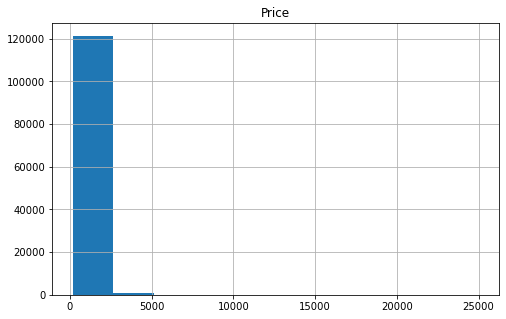

In [38]:
df2.hist('Price',figsize=(8,5))

In [39]:
df2['Price']= np.log1p(df2["Price"].values)
df2.head()

,ASIN,Date,Price,dayofyear,dayofmonth,weekofyear,price_lag_91,price_lag_98,price_lag_105,price_lag_112,...,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,season_0,season_1,season_2,season_3
0,B00S98NXKY,2015-06-19,7.080018,170,19,25,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
1,B00S98NXKY,2015-07-14,7.065605,195,14,29,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
2,B00S98NXKY,2015-08-12,7.090069,224,12,33,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
3,B00S98NXKY,2015-08-22,7.048378,234,22,34,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
4,B00S98NXKY,2015-09-03,7.090901,246,3,36,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1


array([[<AxesSubplot:title={'center':'Price'}>]], dtype=object)

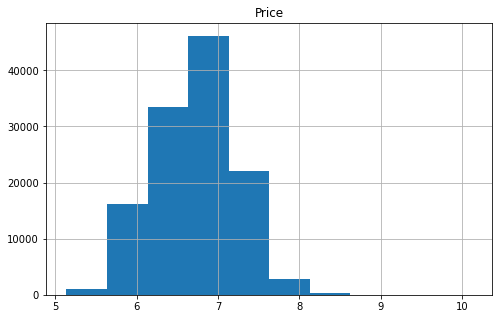

In [40]:
df2.hist('Price',figsize=(8,5))

In [112]:
# Splitting Train and Test

In [41]:
df_model= df2.copy()

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
train, val = train_test_split(df_model, test_size=0.2, random_state=None, shuffle=False)

In [44]:
train

,ASIN,Date,Price,dayofyear,dayofmonth,weekofyear,price_lag_91,price_lag_98,price_lag_105,price_lag_112,...,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,season_0,season_1,season_2,season_3
0,B00S98NXKY,2015-06-19,7.080018,170,19,25,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
1,B00S98NXKY,2015-07-14,7.065605,195,14,29,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
2,B00S98NXKY,2015-08-12,7.090069,224,12,33,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
3,B00S98NXKY,2015-08-22,7.048378,234,22,34,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
4,B00S98NXKY,2015-09-03,7.090901,246,3,36,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97575,B09DKQ3K44,2021-09-16,6.584778,259,16,37,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,1
97576,B09DKQ3K44,2021-09-22,6.637245,265,22,38,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,1
97577,B09DKQ3K44,2021-09-28,6.637245,271,28,39,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,1
97578,B09DKQ3K44,2021-10-03,6.637245,276,3,39,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,1


In [45]:
val

,ASIN,Date,Price,dayofyear,dayofmonth,weekofyear,price_lag_91,price_lag_98,price_lag_105,price_lag_112,...,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,season_0,season_1,season_2,season_3
97580,B09DKQ3K44,2021-11-08,6.637245,312,8,45,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,1
97581,B09DKQ3K44,2022-11-23,6.684612,327,23,47,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
97582,B09DKQ96RP,2021-08-26,6.624052,238,26,34,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,1,0
97583,B09DKQ96RP,2021-09-18,6.587536,261,18,37,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,1
97584,B09DKQ96RP,2021-09-24,6.511730,267,24,38,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121970,B0BJCKZFZ3,2022-11-23,6.249956,327,23,47,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
121971,B0BJCKZFZ3,2022-11-25,6.248971,329,25,47,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
121972,B0BJCKZFZ3,2022-11-25,6.259581,329,25,47,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
121973,B0BJCKZFZ3,2022-11-28,6.270970,332,28,48,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1


In [46]:
cols = [col for col in train.columns if col not in ['Date', 'ASIN', "Price", "year"]]

In [47]:
X_train = train[cols]
Y_train = train['Price']

X_val = val[cols]
Y_val = val['Price']

X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((97580, 95), (97580,), (24395, 95), (24395,))

In [136]:
###Building and Running XGB Regressor

In [48]:
# SMAPE: Symmetric mean absolute percentage error (adjusted MAPE)
def smape(preds, target):
    n = len(preds)
    masked_arr = ~((preds == 0) & (target == 0))
    preds, target = preds[masked_arr], target[masked_arr]
    num = np.abs(preds-target)
    denom = np.abs(preds)+np.abs(target)
    smape_val = (200*np.sum(num/denom))/n
    return smape_val

def xgb_smape(y_pred, y_true):
    smape_val = smape(np.expm1(preds), np.expm1(y_true))
    return 'SMAPE', smape_val, False

In [61]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
import xgboost as xgb

In [50]:
model= xgb.XGBRegressor()

In [51]:
from sklearn.metrics import explained_variance_score,mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# To assess the variation between predictions and actual data, 
# the SMAPE (Symmetric mean absolute percentage error (adjusted MAPE)) metric.

In [52]:
%%time
first_model= model.fit(X_train, Y_train,
                       eval_metric= lambda y_pred, y_true: [xgb_smape(y_pred, y_true)])


print("VALID SMAPE:", smape(np.expm1(first_model.predict(X_val)), np.expm1(Y_val)))

print("\tExplained variance:", explained_variance_score(Y_val, first_model.predict(X_val)))
print("\tMean absolute error (MAE):", mean_absolute_error(Y_val, first_model.predict(X_val)))
print("\tRoot Mean squared error (RMSE):",  np.sqrt(mean_squared_error(Y_val, first_model.predict(X_val))))
print("\tR2 score:", r2_score(Y_val, first_model.predict(X_val)))

C:\Users\EVA\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


VALID SMAPE: 22.58744055298326
	Explained variance: 0.47587891017416284
	Mean absolute error (MAE): 0.23112281091749742
	Root Mean squared error (RMSE): 0.32596486932557583
	R2 score: 0.42681338476645536
Wall time: 6.85 s


In [66]:
# Feature importances

# Which features are the most important in the regression calculation?

In [53]:
feature_importance= pd.DataFrame(data   = first_model.feature_importances_,
                 index  = first_model.feature_names_in_,
                 columns= ['importance'])
feature_importance.sort_values('importance', ascending=False).head(25)

,importance
price_roll_mean_365,0.391568
year_2022,0.053405
year_2021,0.045906
year_2019,0.021601
year_2020,0.019998
price_ewm_alpha_05_lag_270,0.013583
price_ewm_alpha_09_lag_91,0.013156
month_8,0.012964
year_2016,0.012738
month_2,0.012047


In [ ]:
# Test Data Predictions

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
df_final_model= df2.copy()

In [56]:
train, test = train_test_split(df_final_model, test_size=0.2, random_state=None, shuffle=False)

In [57]:
train.head()

,ASIN,Date,Price,dayofyear,dayofmonth,weekofyear,price_lag_91,price_lag_98,price_lag_105,price_lag_112,...,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,season_0,season_1,season_2,season_3
0,B00S98NXKY,2015-06-19,7.080018,170,19,25,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
1,B00S98NXKY,2015-07-14,7.065605,195,14,29,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
2,B00S98NXKY,2015-08-12,7.090069,224,12,33,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
3,B00S98NXKY,2015-08-22,7.048378,234,22,34,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
4,B00S98NXKY,2015-09-03,7.090901,246,3,36,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1


In [58]:
Y_train = train['Price']

In [59]:
Y_train

0        7.080018
1        7.065605
2        7.090069
3        7.048378
4        7.090901
           ...   
97575    6.584778
97576    6.637245
97577    6.637245
97578    6.637245
97579    6.637245
Name: Price, Length: 97580, dtype: float64

In [60]:
X_train = train[cols]

In [61]:
X_train.head()

,dayofyear,dayofmonth,weekofyear,price_lag_91,price_lag_98,price_lag_105,price_lag_112,price_lag_119,price_lag_126,price_lag_182,...,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,season_0,season_1,season_2,season_3
0,170,19,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
1,195,14,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
2,224,12,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
3,234,22,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
4,246,3,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1


In [62]:
test

,ASIN,Date,Price,dayofyear,dayofmonth,weekofyear,price_lag_91,price_lag_98,price_lag_105,price_lag_112,...,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,season_0,season_1,season_2,season_3
97580,B09DKQ3K44,2021-11-08,6.637245,312,8,45,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,1
97581,B09DKQ3K44,2022-11-23,6.684612,327,23,47,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
97582,B09DKQ96RP,2021-08-26,6.624052,238,26,34,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,1,0
97583,B09DKQ96RP,2021-09-18,6.587536,261,18,37,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,1
97584,B09DKQ96RP,2021-09-24,6.511730,267,24,38,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121970,B0BJCKZFZ3,2022-11-23,6.249956,327,23,47,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
121971,B0BJCKZFZ3,2022-11-25,6.248971,329,25,47,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
121972,B0BJCKZFZ3,2022-11-25,6.259581,329,25,47,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
121973,B0BJCKZFZ3,2022-11-28,6.270970,332,28,48,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1


In [63]:
X_test = test[cols]

In [64]:
test_model= xgb.XGBRegressor(colsample_bytree= 0.3, learning_rate= 0.1, max_depth= 3, n_estimators= 1000)

In [65]:
start = time()
xgb_params= {"colsample_bytree": 0.3, 
             "learning_rate": 0.1, 
             "max_depth": 3,
             "n_estimators": 1000,
             "verbose": 100,
             "num_boost_round": model.best_iteration}

xgbtrain_all= xgb.DMatrix(data=X_train, label=Y_train)

test_model= xgb.train(xgb_params, xgbtrain_all,                      
                      num_boost_round=model.best_iteration)

train_time = time() - start
start = time()
test_preds = test_model.predict(xgb.DMatrix(X_test))
predict_time = time()-start

[11:02:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators", "num_boost_round", "verbose" } are not used.



In [66]:
test_preds

array([6.885183 , 6.7104044, 6.9353514, ..., 6.1892433, 6.1892433,
       6.1892433], dtype=float32)

In [67]:
test

,ASIN,Date,Price,dayofyear,dayofmonth,weekofyear,price_lag_91,price_lag_98,price_lag_105,price_lag_112,...,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,season_0,season_1,season_2,season_3
97580,B09DKQ3K44,2021-11-08,6.637245,312,8,45,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,1
97581,B09DKQ3K44,2022-11-23,6.684612,327,23,47,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
97582,B09DKQ96RP,2021-08-26,6.624052,238,26,34,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,1,0
97583,B09DKQ96RP,2021-09-18,6.587536,261,18,37,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,1
97584,B09DKQ96RP,2021-09-24,6.511730,267,24,38,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121970,B0BJCKZFZ3,2022-11-23,6.249956,327,23,47,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
121971,B0BJCKZFZ3,2022-11-25,6.248971,329,25,47,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
121972,B0BJCKZFZ3,2022-11-25,6.259581,329,25,47,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
121973,B0BJCKZFZ3,2022-11-28,6.270970,332,28,48,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1


In [71]:
submission_df = test.loc[:, ['ASIN', 'Price']]
submission_df['Price'] = np.expm1(test_preds)
submission_df['ASIN'] = submission_df.ASIN
submission_df.head(10)

,ASIN,Price
97580,B09DKQ3K44,976.680420
97581,B09DKQ3K44,819.902527
97582,B09DKQ96RP,1026.980347
97583,B09DKQ96RP,978.991760
97584,B09DKQ96RP,978.780090
97585,B09DKQ96RP,976.680420
97586,B09DKQ96RP,972.641785
97587,B09DKQ96RP,975.117615
97588,B09DKQ96RP,961.189758
97589,B09DKQ96RP,959.223022


In [69]:
submission_df.tail(10)

,ASIN,Price
121965,B0BJCKZFZ3,823.707886
121966,B0BJCKZFZ3,823.707886
121967,B0BJCKZFZ3,823.886047
121968,B0BJCKZFZ3,821.583923
121969,B0BJCKZFZ3,823.583618
121970,B0BJCKZFZ3,819.902527
121971,B0BJCKZFZ3,819.902527
121972,B0BJCKZFZ3,486.477112
121973,B0BJCKZFZ3,486.477112
121974,B0BJCKZFZ3,486.477112


In [70]:
df1[df1['ASIN'] == 'B0BJCKZFZ3'] [['Price', 'Date']]

,Price,Date
121962,562.99,2022-10-18
121963,552.24,2022-10-21
121964,528.99,2022-10-21
121965,511.99,2022-10-29
121966,517.99,2022-10-29
121967,516.99,2022-11-09
121968,516.47,2022-11-12
121969,517.00,2022-11-21
121970,516.99,2022-11-23
121971,516.48,2022-11-25


In [72]:
df1[df1['ASIN'] == 'B09DKQ96RP'] [['Price', 'Date']]

,Price,Date
97582,751.99,2021-08-26
97583,724.99,2021-09-18
97584,671.99,2021-09-24
97585,660.99,2021-10-12
97586,650.99,2021-10-23
97587,624.99,2021-11-04
97588,656.99,2021-11-16
97589,655.99,2021-11-23
97590,641.99,2022-01-10
97591,612.99,2022-02-07
